Numerator coefficients: [0.12529716]
Denominator coefficients: [1.         0.58157986 1.16911757 0.40476795 0.17698695]


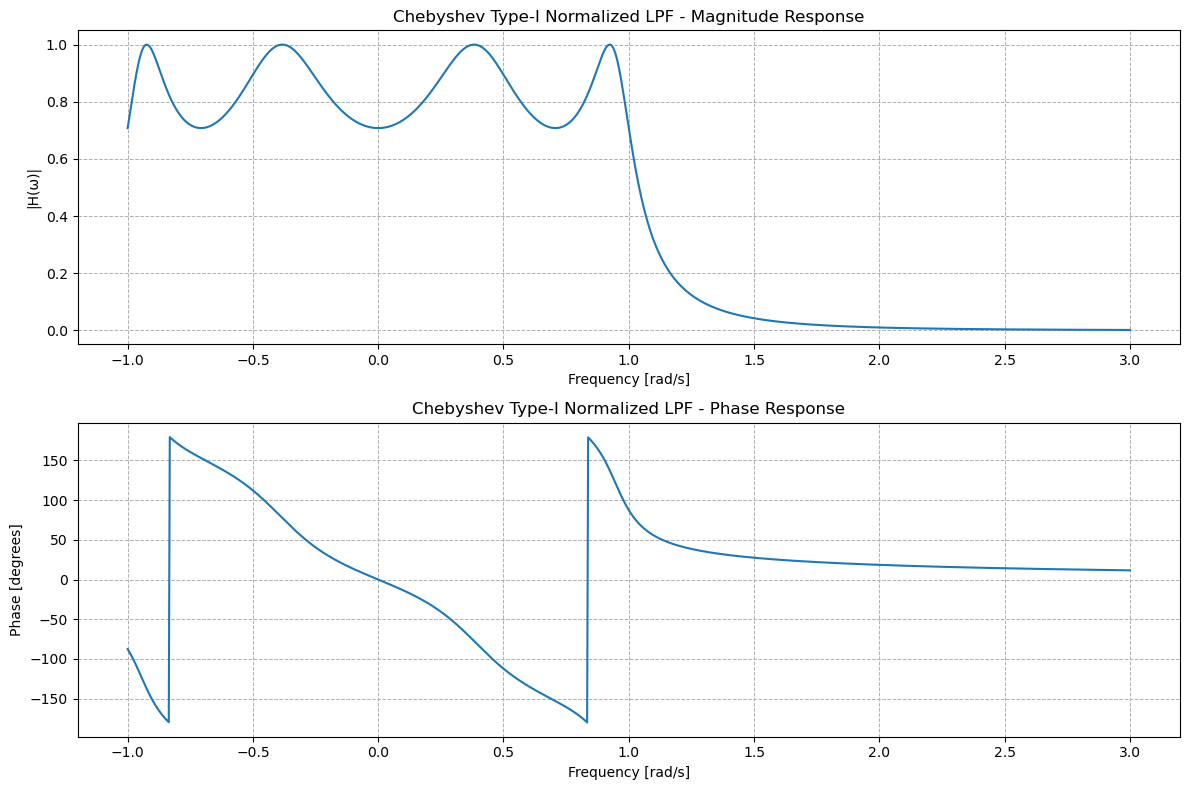

In [2]:
# normal linear scale version
# when using bode plot for frequency response, the plot always begins from negative axis style (with 0 at top)
# so, i calculated the frequency manually

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheb1ap, freqs, zpk2tf

# Design a 4th-order Chebyshev Type-I normalized lowpass filter with 3-dB ripple
order = 4
ripple = 3  # in dB

# Get poles, zeros, and gain of the filter
z, p, k = cheb1ap(order, ripple)

# Convert zeros, poles, and gain to numerator and denominator of transfer function
num, den = zpk2tf(z, p, k)

# Display numerator and denominator
print('Numerator coefficients:', num)
print('Denominator coefficients:', den)

# Define the frequency range # although can be calcualted by bode plot and db can be changed to linear scale gain,
w = np.linspace(-1, 3, 1000)  # Frequency vector

# Compute the frequency response
w, h = freqs(num, den, w)

# Compute magnitude and phase
magnitude = np.abs(h)
phase = np.angle(h)

# Plot the magnitude and phase responses
plt.figure(figsize=(12, 8))


# Magnitude response plot
# plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.subplot(2, 1, 1)
plt.plot(w, magnitude)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('|H(ω)|')
plt.title('Chebyshev Type-I Normalized LPF - Magnitude Response')

# Phase response plot
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(phase))
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Chebyshev Type-I Normalized LPF - Phase Response')

# Show plots
plt.tight_layout()
plt.show()